# Exploratory Data Analysis (EDA)

What to Look For:

- **Dataset size:** Do you have enough data? (Generally want 100+ samples).
- **Feature types:** Which columns are numbers vs text/categories?
- **Missing values:** Are there empty cells in your data?
- **Data ranges:** Do the numbers make sense for what they represent?

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

## Essential Dataset Overview Steps

In [110]:
# Basic dataset information
print("Dataset Shape:", X_train.shape)  # (rows, columns)
print("Number of features:", len(X_train.columns))
print("Number of samples:", len(X_train))

# Look at the first few rows
print(X_train.head())

# Get basic info about each column
print(X_train.info())

# Basic statistics for numerical columns
print(X_train.describe())

Dataset Shape: (259, 4)
Number of features: 4
Number of samples: 259
   Year     Area  Savanna fires  Forest fires
0  1990  Albania         5.5561        7.0253
1  1991  Albania         5.5561        7.0253
2  1992  Albania         5.5561        7.0253
3  1993  Albania         5.5561        7.0253
4  1994  Albania         5.5561        7.0253
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           259 non-null    int64  
 1   Area           259 non-null    object 
 2   Savanna fires  259 non-null    float64
 3   Forest fires   259 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.2+ KB
None
              Year  Savanna fires  Forest fires
count   259.000000     259.000000    259.000000
mean   2001.756757      13.336624     19.401908
std       6.544918      23.448898     40.612969
min    1990.000000       0.0

## Quick Quality Checks

In [111]:
# Check for missing values
missing_data = X_train.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

# Check data types
print("\nData types:")
print(X_train.dtypes)

# Look for duplicate rows
duplicates = X_train.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Missing values per column:
Series([], dtype: int64)

Data types:
Year               int64
Area              object
Savanna fires    float64
Forest fires     float64
dtype: object

Duplicate rows: 0


## Basic target statistics

**What to Look For:**

- Shape of distribution: Is it bell-shaped (normal) or skewed?
- Range: Are the values what you'd expect?
- Outliers: Are there extremely high or low values?
- Zeros or negatives: Do these make sense for your problem?

**Common Target Patterns:**

- Normal distribution: Bell-shaped, mean ≈ median (good for linear models).
- Right-skewed: Long tail on the right, mean > median (common for prices, counts).
- Left-skewed: Long tail on the left, mean < median (less common).
- Bimodal: Two peaks (might indicate two different groups).

In [112]:
print("Target Variable Analysis:")
print(f"Mean: {y_train.mean()}")
print(f"Median: {y_train.median()}")
print(f"Standard Deviation: {y_train.std()}")
print(f"Minimum: {y_train.min()}")
print(f"Maximum: {y_train.max()}")

# Check for missing values in target
print(f"Missing values: {y_train.isnull().sum()}")

Target Variable Analysis:
Mean: total_emission    26220.351358
dtype: float64
Median: total_emission    5589.867192
dtype: float64
Standard Deviation: total_emission    42026.891294
dtype: float64
Minimum: total_emission   -15550.732854
dtype: float64
Maximum: total_emission    161379.8748
dtype: float64
Missing values: total_emission    0
dtype: int64


## Visualizing your target

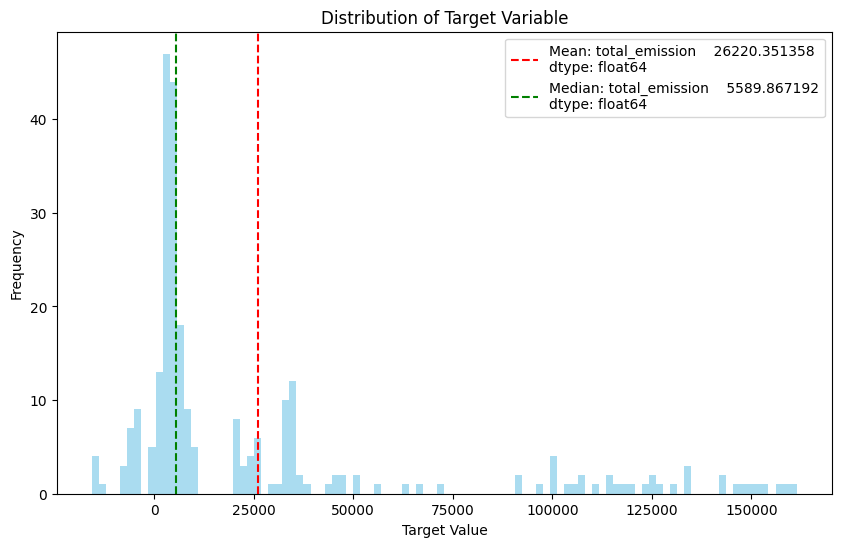

In [113]:
# Create a simple histogram
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=100, alpha=0.7, color='skyblue')
plt.axvline(y_train['total_emission'].mean(), color='red', linestyle='--', label=f'Mean: {y_train.mean()}')
plt.axvline(y_train['total_emission'].median(), color='green', linestyle='--', label=f'Median: {y_train.median()}')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.legend()
plt.show()

## Understanding Your Target Variable - What Am I Trying to Predict?

Your target variable is the heart of your regression problem - it's what you're trying to predict. Understanding its distribution, range, and characteristics is crucial because these properties directly influence your choice of algorithms, preprocessing steps, and evaluation metrics.

**Key Target Characteristics to Analyze:**

- **Distribution shape:** Is it bell-shaped (normal), skewed, or has multiple peaks?
- **Range and scale:** What are the minimum, maximum, and typical values?
- **Outliers:** Are there extreme values that might represent errors or special cases?
- **Missing values:** Any gaps in your target that need addressing?

       total_emission
count          259.00
mean         26220.35
std          42026.89
min         -15550.73
25%           2864.29
50%           5589.87
75%          32706.62
max         161379.87


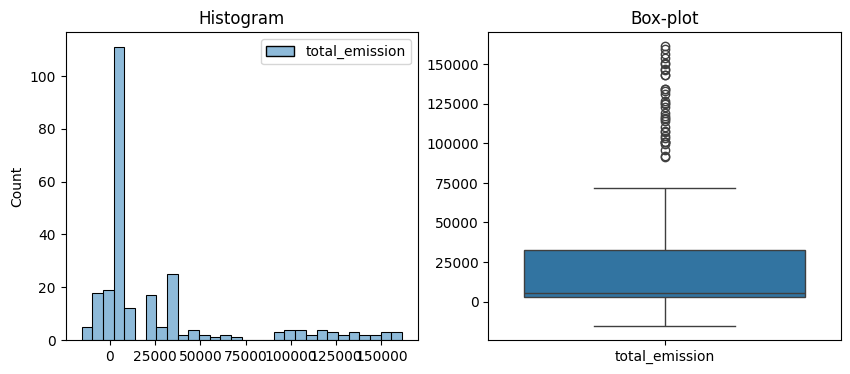

In [114]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(y_train, ax=ax[0], bins=30); ax[0].set_title("Histogram")
sns.boxplot(y_train, ax=ax[1]);            ax[1].set_title("Box-plot")
print(y_train.describe().round(2))

## Numerical Features – Fast Stats & Distributions

Numeric stats:
                   mean    std     min      max
Year           2001.76   6.54  1990.0  2012.00
Savanna fires    13.34  23.45     0.0   187.87
Forest fires     19.40  40.61     0.0   327.25


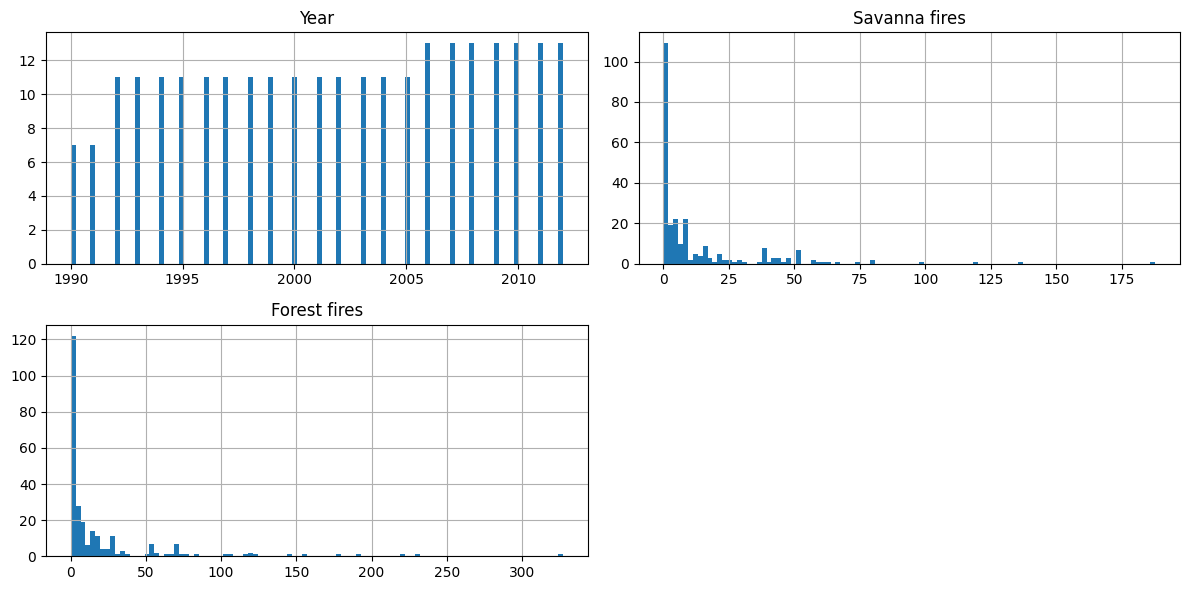

In [115]:
num_cols = X_train.select_dtypes('number').columns
print("Numeric stats:\n", X_train[num_cols].describe().T[['mean','std','min','max']].round(2))
# Plot first 4 histograms*
X_train[num_cols[:4]].hist(bins=100, figsize=(12,6))
plt.tight_layout()
plt.show()

## Numeric ↔ Target Correlation

The correlation between numerical features and your target variable reveals which features are likely to be useful predictors. This analysis helps you prioritize which features to focus on during modeling and identifies potential star performers that might drive your model's success.

**Understanding Correlation Strength:**

- |r| > 0.7: Very strong relationship - likely excellent predictor.
- 0.3 < |r| < 0.7: Moderate relationship - good predictor candidate.
- 0.1 < |r| < 0.3: Weak relationship - might be useful in combination.
- |r| < 0.1: Very weak relationship - consider removing.

Top correlations:
 Savanna fires    0.257
Forest fires     0.198
dtype: float64


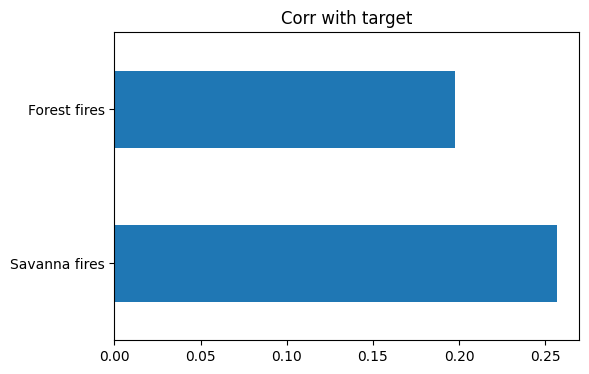

In [116]:
correlations = X_train[['Forest fires', 'Savanna fires']].corrwith(y_train['total_emission']).sort_values(key=abs, ascending=False)
print("Top correlations:\n", correlations.head(5).round(3))
correlations.head(10).plot.barh(figsize=(6,4)); plt.title("Corr with target"); plt.show()

## Categorical Features – Frequency & Target Mean

**Key Categorical Analysis Elements:**

- **Cardinality:** How many unique categories exist.
- **Frequency distribution:** Which categories are common vs rare.
- **Target differences:** How much the target varies across categories.
- **Missing patterns:** Whether missing categorical data follows any pattern.

IN

Area:
                         count           mean
Area                                        
Albania                    23    3493.979620
Andorra                    23    5257.176886
Greece                     23   34071.671035
Italy                      23  135938.912917
Malta                      23    2153.674777
Portugal                   23   25335.777852
Spain                      23   78308.132157
Bosnia and Herzegovina     21    5567.995057
Croatia                    21    8416.643642
North Macedonia            21    3665.317889
Slovenia                   21   -4732.331298
Montenegro                  7     975.545003
Serbia                      7   -4556.060713


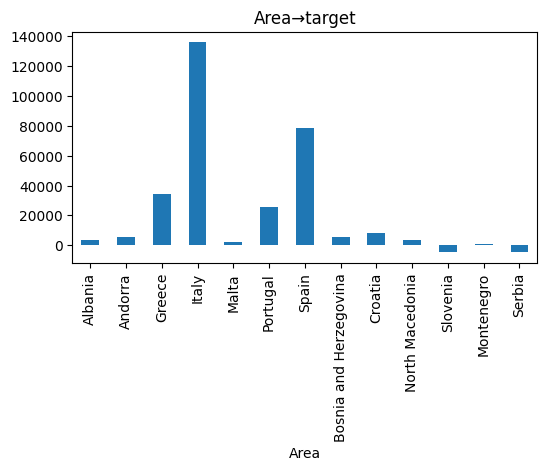

In [117]:
cat_cols = X_train.select_dtypes('object').columns

for col in cat_cols:
    if X_train[col].nunique() <= 500:
        print('IN')
        df = X_train.assign(target=y_train)
        summary = df.groupby(col)['target'].agg(['count','mean']).sort_values(by='count', ascending=False)
        print(f"\n{col}:\n", summary)
        summary['mean'].plot.bar(figsize=(6,3)); plt.title(f"{col}→target"); plt.show()

## Missing-Data Map

**Types of Missing Data Patterns:**

- **Random missing:** Scattered gaps with no clear pattern.
- **Systematic missing:** Missing values concentrated in specific rows/columns.
- **Informative missing:** Absence indicates something meaningful (e.g., "income" missing for unemployed people).

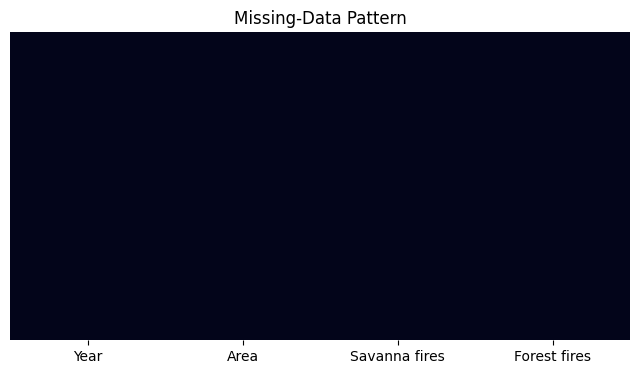

In [118]:
plt.figure(figsize=(8,4))
sns.heatmap(X_train.isnull(), cbar=False, yticklabels=False)
plt.title("Missing-Data Pattern"); plt.show()

# Outlier Detection (IQR Rule)

Why Outliers Matter:

- **Model sensitivity:** Linear models are heavily influenced by extreme values.
- **Scale distortion:** Outliers can make normal data appear compressed.
- **Feature engineering impact:** Scaling and transformation decisions affected by extremes.

In [119]:
def iqr_outliers(s):
    q1,q3=s.quantile([.25,.75]); iqr=q3-q1
    return s[(s<q1-1.5*iqr)|(s>q3+1.5*iqr)]
for col in num_cols[:4]:
    outs = iqr_outliers(X_train[col])
    print(f"{col}: {len(outs)} outliers ({len(outs)/len(X_train)*100:.1f}%)")


Year: 0 outliers (0.0%)
Savanna fires: 30 outliers (11.6%)
Forest fires: 35 outliers (13.5%)


## Feature Multicollinearity - Avoiding Redundancy

Why Multicollinearity Matters:

- **Model instability:** Small data changes can cause large coefficient changes.
- **Interpretation difficulty:** Hard to isolate individual feature effects.
- **Computational waste:** Processing redundant information.
- **Overfitting risk:** More parameters than necessary for the same predictive power.

In [120]:
corr_mat = X_train[num_cols].corr().abs()
high_corr = np.where((corr_mat>0.8)&(corr_mat<1.0))
pairs = [(num_cols[i],num_cols[j],corr_mat.iat[i,j]) 
         for i,j in zip(*high_corr) if i<j]
print("High-corr pairs:", pairs[:5])

High-corr pairs: []


## EDA Summary Dashboard - Key Insights at a Glance

In [121]:
print("🚀 EDA SNAPSHOT")
print(f"Target skew: {y_train.skew()}")
print("Strongest predictor:", corrs.index[0], corrs.max().round(3))
miss = (X_train.isnull().mean()*100).sort_values(ascending=False).head(3)
print("Top missing cols:\n", miss.round(1))
print("High-corr pairs:", pairs[:3])

🚀 EDA SNAPSHOT
Target skew: total_emission    1.847378
dtype: float64
Strongest predictor: Forest fires nan
Top missing cols:
 Year             0.0
Area             0.0
Savanna fires    0.0
dtype: float64
High-corr pairs: []
